The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

## Questions to be answered
- What is the most commonly awarded gender and birth country?
- What decade had the highest proportion of US-born winners?
- What decade and category pair had the highest proportion of female laureates?
- Who was the first woman to receive a Nobel Prize, and in what category?
- Which individuals or organizations have won multiple Nobel Prizes throughout the years?

In [62]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np

# Start coding here!
nobel = pd.read_csv('data/nobel.csv')
nobel.describe()

,year,laureate_id
count,1000.000000,1000.000000
mean,1973.721000,509.099000
std,34.523195,298.130617
min,1901.000000,1.000000
25%,1949.750000,250.750000
50%,1979.000000,500.500000
75%,2003.000000,764.250000
max,2023.000000,1034.000000


In [63]:
# Get the most frequent gender from the 'sex' column
top_gender = nobel['sex'].value_counts().index[0]
# Get the most frequent birth country from the 'birth_country' column 
top_country = nobel['birth_country'].value_counts().index[0]
print(top_gender)
print(top_country)

Male
United States of America


<AxesSubplot: xlabel='decades', ylabel='from_US'>

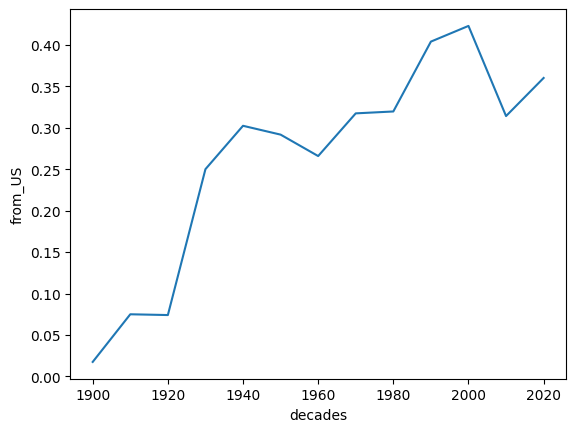

In [64]:
# Create a new column 'from_US' indicating whether the individual is from the United States
nobel['from_US'] = nobel['birth_country'].apply(lambda x: True if x == 'United States of America' else False)

# Create a new column 'decades' representing the decade of the year
nobel['decades'] = nobel['year'].apply(lambda x: int(x/10) * 10)

# Group data by decades and calculate the mean proportion of individuals from the US
us_decades = nobel.groupby('decades')['from_US'].mean()

# Find the decade with the highest number of individuals from the US
max_decade_usa = nobel.groupby('decades')['from_US'].sum().sort_values(ascending=False).index[0]

# Plot a line plot showing the trend of proportion of individuals from the US across decades
sns.lineplot(x=us_decades.index, y=us_decades)


In [65]:
# Create a binary column indicating whether the winner is female
nobel['female_winner'] = nobel['sex'] == 'Female'

# Calculate the proportion of female winners for each decade and category
prop_female_winners = nobel.groupby(['decades', 'category'], as_index=False)['female_winner'].mean()

# Find the decade and category with the highest proportion of female winners
max_female_decade_category = prop_female_winners[prop_female_winners['female_winner'] == prop_female_winners['female_winner'].max()][['decades', 'category']]

# Create a dictionary with the decade and category of the highest proportion of female winners
max_female_dict = {max_female_decade_category['decades'].values[0]: max_female_decade_category['category'].values[0]}

# Print the dictionary containing the decade and category with the highest proportion of female winners
print(max_female_dict)



{2020: 'Literature'}


In [66]:
# Find the earliest recorded year where the sex is female
min_year = nobel.query('sex == "Female"')['year'].min()

# Filter the DataFrame to include only entries from the earliest year where the sex is female
voice_of_women = nobel.query('year == @min_year & sex == "Female"')[['full_name', 'category']]

# Extract the full name and category of the first woman
first_woman_name = voice_of_women.full_name.to_string(index=False)
first_woman_category = voice_of_women.category.to_string(index=False)

# Print the full name and category of the first woman
print(first_woman_name)
print(first_woman_category)

Marie Curie, née Sklodowska
Physics


In [67]:
# Group names by 'full_name' and count occurrences
multiple = nobel.full_name.value_counts()

# Filter names appearing more than once
repeats = multiple[multiple >= 2]

# Convert repeated names to a list
repeat_list = list(repeats.index)

# Print list of repeated names
print(repeat_list)

['Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Linus Carl Pauling', 'John Bardeen', 'Frederick Sanger', 'Marie Curie, née Sklodowska', 'Office of the United Nations High Commissioner for Refugees (UNHCR)']
